# Automated Logical Reasoning - Assignment 1 Problem 3 and Feedback
#### Name: Kai Ferragallo-Hawkins
#### Date: 28.3.2024
### General Description
The goal of this code is to implement the SAT encoding of graph 3-coloring, and to solve a graph 3-coloring using a SAT solver.


## Problem 3a - Implementing DIMACS CNF Encoding
You can see the class file "encoder_week1" or HTML pdoc explanation to see the more detailed code for how I choose to encode files for this assignment.

In [443]:
import importlib
import encoder_week1 as en

# Reloads functions from en when testing, else Jupyter will set them to sys and not update.
importlib.reload(en)

# Reading file input
color3_encoding_3b = en.DIMACS_CNF_Encoding()
color3_encoding_3b.read_graph_input("problem3b.apx")
print(f"Original Argument Index: {color3_encoding_3b.arg_index}")

# CNF encoding and showing argument index change/edges. Add_colors can be run separately.
color3_encoding_3b.cnf_color_encoding(colors=3)
print(f"Color Argument Index: {color3_encoding_3b.arg_index}")
print(f"Edges: {color3_encoding_3b.edges}")

# Printing DIMACS CNF encoding into console. If file_print_loc is false, will not print to any location.
print("DIMACS CNF Encoding:")
color3_encoding_3b.cnf_printing(console=True, file_print_loc="problem3b_solution.apx")

Original Argument Index: {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7}
Color Argument Index: {'a': [1, 8, 15], 'b': [2, 9, 16], 'c': [3, 10, 17], 'd': [4, 11, 18], 'e': [5, 12, 19], 'f': [6, 13, 20], 'g': [7, 14, 21]}
Edges: [['a', 'b'], ['a', 'c'], ['a', 'g'], ['b', 'c'], ['b', 'd'], ['c', 'd'], ['d', 'e'], ['d', 'f'], ['e', 'f'], ['e', 'g'], ['f', 'g']]
DIMACS CNF Encoding:
p cnf 21 61
1 8 15 0
-1 -8 0
-1 -15 0
-8 -15 0
2 9 16 0
-2 -9 0
-2 -16 0
-9 -16 0
3 10 17 0
-3 -10 0
-3 -17 0
-10 -17 0
4 11 18 0
-4 -11 0
-4 -18 0
-11 -18 0
5 12 19 0
-5 -12 0
-5 -19 0
-12 -19 0
6 13 20 0
-6 -13 0
-6 -20 0
-13 -20 0
7 14 21 0
-7 -14 0
-7 -21 0
-14 -21 0
-1 -2 0
-8 -9 0
-15 -16 0
-1 -3 0
-8 -10 0
-15 -17 0
-1 -7 0
-8 -14 0
-15 -21 0
-2 -3 0
-9 -10 0
-16 -17 0
-2 -4 0
-9 -11 0
-16 -18 0
-3 -4 0
-10 -11 0
-17 -18 0
-4 -5 0
-11 -12 0
-18 -19 0
-4 -6 0
-11 -13 0
-18 -20 0
-5 -6 0
-12 -13 0
-19 -20 0
-5 -7 0
-12 -14 0
-19 -21 0
-6 -7 0
-13 -14 0
-20 -21 0


## Problem 3b - Check if Graph is 3-Colorable
Here, I use Glucose42 to check if the graph for problem 3b is 3-colorable. The answer found is **False**.

In [444]:
from pysat.solvers import Glucose42

# Creating Glucose42 solver with the color3_encoding results as an input
g_3b = Glucose42(bootstrap_with=color3_encoding_3b.dimacs_cnf)

# Solving problem 3b
solution_3b_tf = g_3b.solve()
print(f"Is there a solution to problem 3b? The answer is... {solution_3b_tf}")
solution_3b = g_3b.get_model()
print(solution_3b)

Is there a solution to problem 3b? The answer is... False
None


## Problem 3c - Check if Adjusted Graph is 3-Colorable
Here, I use Glucose42 to check if the graph for problem 3c is 3-colorable, if the edge {a,c} is removed from graph 3b. The answer found is **True**.

In [445]:
# Creating new encoding with edge {a,c} removed
color3_encoding_3c = en.DIMACS_CNF_Encoding()
color3_encoding_3c.read_graph_input("problem3c.apx")
color3_encoding_3c.cnf_color_encoding(colors=3)
color3_encoding_3c.cnf_printing(console=False, file_print_loc="problem3c_solution.apx")

# Creating Glucose42 solver with the color3_encoding results as an input
g_3c = Glucose42(bootstrap_with=color3_encoding_3c.dimacs_cnf)

# Solving problem 3c
solution_3c_tf = g_3c.solve()
print(f"Is there a solution to problem 3b? The answer is... {solution_3c_tf}")
solution_3c = g_3c.get_model()
print(f"The solution is: {solution_3c}")
print("Or better stated, the colors are...")
#print(f"Color Argument Index: {color3_encoding_3c.arg_index}")

# Establishing colors for graph
key_color_index = {}

## Iterating over the arg_index to set the colors based on the solution
for items in enumerate(color3_encoding_3c.arg_index.items(), start=1):
    key = items[1][0]
    indices = items[1][1]
    for i, index in enumerate(indices):
        if solution_3c[abs(index) - 1] > 0:
            key_color_index[key] = (i+1)

## Printing colors       
print(key_color_index)

jack = g_3c.enum_models()
# print(g_3c.enum_models())
# for model in jack:
#     print(model)

Is there a solution to problem 3b? The answer is... True
The solution is: [1, -2, 3, -4, -5, 6, -7, -8, -9, -10, 11, -12, -13, 14, -15, 16, -17, -18, 19, -20, -21]
Or better stated, the colors are...
{'a': 1, 'b': 3, 'c': 1, 'd': 2, 'e': 3, 'f': 1, 'g': 2}


### Making a Graph With 3c results
Here, I graph the 3c results, with color 1 being red, color 2 being blue, and color 3 being green. Should work for any 3-color graph.

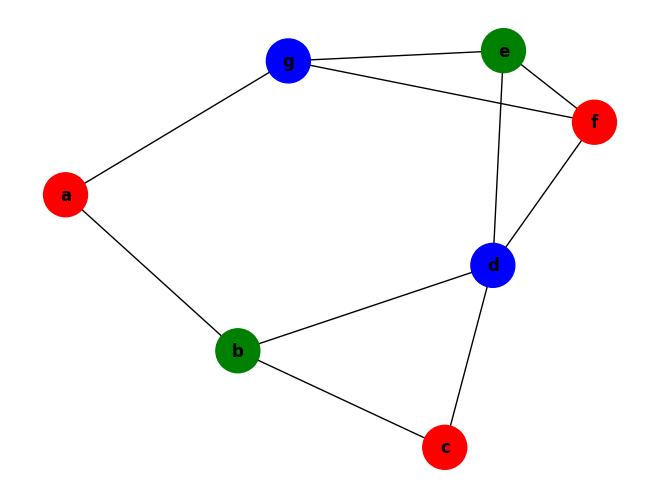

In [446]:
import networkx as nx
import matplotlib.pyplot as plt
# Setup
## Colors indexes
color_index = {1: "red", 2: "blue", 3: "green"}

## Graph
G = nx.Graph()
G.add_edges_from(color3_encoding_3c.edges)

# Matching nodes to colors
node_colors_for_graph = {node: {'color': color_index[color]} for node, color in key_color_index.items()}

# Drawing graph
node_colors = [node_colors_for_graph[node]['color'] for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, node_size=1000, font_size=12, font_weight='bold')
plt.show()

## Problem 3d - Is there an obtainable 3-coloring that does not come from interchanging the solutions?

If there was an obtainable 3-coloring that does not come from interchanging the solutions, then if the differences between all potential solutions are checked, at least one should be of an odd length. There are none, so there are no obtainable 3-colorings that do not come from interchanging the solutions!

In [447]:
# Getting all possible solutions
multiple_sol_g3c = g_3c.enum_models()

# Calculating number of solutions and putting all the solutions into a list from the iterable
sol_num_3c = 0
multiple_sol_3c = []
for model in multiple_sol_g3c:
    multiple_sol_3c += [model]
    sol_num_3c += 1
print(f"Total number of solutions: {sol_num_3c}")

# Getting differences with 1st solution
differences = []
for solution in multiple_sol_3c:
    diff_indices = [i for i, (val1, val2) in enumerate(zip(solution, solution_3c), start=1) if val1 != val2]
    differences.append(diff_indices)
print("Differences with 1st solution:", differences)

odd_solutions = 0
even_solutions = 0
for difference in differences:
    if len(difference) % 2 != 0:
        odd_solutions += 1
        print(f"Odd solution found! It's differences are: {difference}")
    else:
        even_solutions += 1

print(f"Total odd solutions: {odd_solutions}")
print(f"Total even solutions: {even_solutions}")

Total number of solutions: 12
Differences with 1st solution: [[], [1, 2, 3, 15, 16, 17], [9, 11, 12, 14, 16, 18, 19, 21], [1, 2, 3, 8, 10, 11, 12, 14, 16, 18, 19, 21], [1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 16, 18, 19, 21], [5, 6, 9, 11, 13, 14, 16, 18, 19, 21], [1, 3, 4, 6, 7, 8, 10, 11, 13, 14], [1, 3, 4, 6, 7, 9, 11, 13, 14, 15, 16, 17], [1, 3, 4, 6, 7, 9, 11, 12, 14, 15, 16, 17, 19, 20], [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 19, 20], [5, 6, 19, 20], [1, 2, 3, 5, 6, 15, 16, 17, 19, 20]]
Total odd solutions: 0
Total even solutions: 12


# Feedback

***Time usage (mandatory):** How many hours did you spend on this home assignment?
Which part did you find the most challenging and why? Which part did you find the
most interesting/rewarding personally?*

- Overall, I likely spent around ~13 hours on this assignment. This timeframe includes me sitting down and trying to understand SAT/CNF and messing around with the tutorial solution code. 

- I found understanding the CNF encodings (problem 2) to be the most challenging/the problems I was most uncertain about. The coding took far more time but also felt far more straightforward. 

- I found the practical aspect of having a desired outcome (in this case, the 3-color graph), breaking it down into it's components, and being able to through proof solve what it should be to be most rewarding. I have found that I enjoy going from the practical to the theoretical rather than the other way around, since it highlights to me how it plays into real life, then exploring the implications of how it does this.

***Feedback on the course so-far (voluntary):** Please let us know if you have any
feedback on the course so far. For example, was something discussed left unclear? Would
you have wanted further examples or more details on some particular aspect? Do you
have anything else regarding the course on your mind?*

It can feel hard for me to discern what is expected to be known and what is new when immediately in class - I am not a CS Masters nor have I taken a CS logic course before (my basis a specialization in Computational Physics for Physics in Bachelors). I think being able to see the slides before the class began would be helpful for me to, potentially, engage more with the work during class/the explanations.

I will also say that, in positives, I think the tutorials are very well done - they were definitely helpful for me in understanding SAT/CNF. The responsiveness I've seen in the Slack is also wonderful/very appreciated!